In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from scipy import stats
from vnstock import *

In [2]:
us = pd.read_csv("us_stock.csv", index_col="Date", parse_dates=True)
vn = pd.read_csv("vn_price.csv", index_col="TradingDate", parse_dates=True)

In [37]:
vn.index.date

array([datetime.date(2013, 2, 25), datetime.date(2013, 2, 26),
       datetime.date(2013, 2, 27), ..., datetime.date(2023, 2, 28),
       datetime.date(2023, 3, 1), datetime.date(2023, 3, 2)], dtype=object)

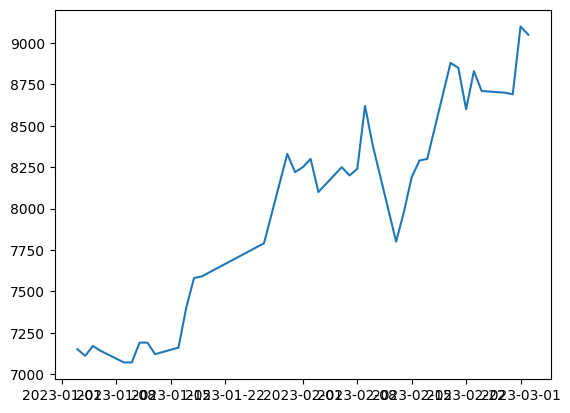

In [41]:
vn_aaa = vn["AAA"][vn.index.year >=2023]
plt.plot(vn_aaa)

In [42]:
len(vn_aaa)

38

In [43]:
mu = vn["AAA"].pct_change().mean()
sigma = vn["AAA"].pct_change().std()
print(mu)
print(sigma)

-0.002392624054571845
0.031407868722470936


$\frac{dS_t}{S_t}=\mu dt+\sigma dB_t$

Mô phỏng $\sigma dB_t$

In [44]:
sigma_dBt = sigma*np.random.randn(287)

Mô phỏng $\mu dt$

In [45]:
mu_dt = mu*np.ones(287)

Vẽ $\mu dt+\sigma dB_t$

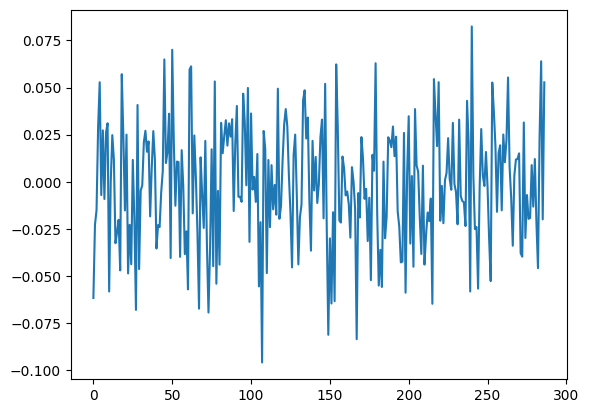

In [46]:
r = sigma_dBt+mu_dt
plt.plot(r)

Mô phỏng $S(t)=S(0)e^{\sigma B_t+(\mu-\frac12 \sigma^2)t}$

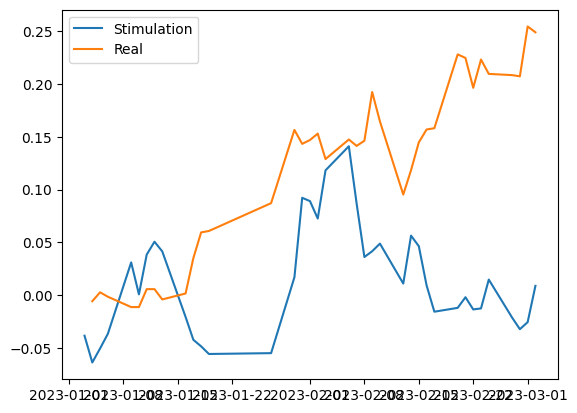

In [49]:
sigma_dBt = sigma*np.random.randn(38)
mu_dt = mu*np.ones(38)
r = sigma_dBt+mu_dt
plt.plot(vn_aaa.index,np.cumsum(r), label="Stimulation")
plt.plot(np.cumsum(vn_aaa.pct_change()),label="Real")
plt.legend()
plt.show()